In this project I will be using relatively basic summary statistics to identify the best markets for advertising an e-learning company that offers programming courses. 

Basic assumptions for this project:
* The e-learning company's courses focus on web and mobile development, but some courses are also about data science, game development, and other areas.
* The e-learning company wants to start by identifying the *two* most promising markets for their product

# Dataset used in this project
I will be using data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). Free Code Camp runs a popular Medium publication, so their survey attracted a relatively wide of new coders
The dataset can be obtained [here](https://github.com/freeCodeCamp/2017-new-coder-survey)

# Reading in and Inspecting the Data

In [154]:
# Reading in data
import pandas as pd
import matplotlib.pyplot as plt
import re
survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory=False)
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We are interested in the locations of the survey population, the locations with greatest number of new coders and how much money potential clients would be interested to spend.
The dataset has a large number of variables that are not of interest for this project so we will filter out only a selected number of columns.

In [155]:
# Names of the first 40 columns
survey.columns[:40]

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC',
       'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons',
       'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone',
       'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls',
       'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode',
       'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive',
       'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus',
       'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting',
       'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt',
       'HasFinancialDependents', 'HasHighSpdInternet'],
      dtype='object')

In [156]:
# Names of the remaining columns
survey.columns[40:]

Index(['HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt',
       'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y', 'Income',
       'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits', 'IsSoftwareDev',
       'IsUnderEmployed', 'JobApplyWhen', 'JobInterestBackEnd',
       'JobInterestDataEngr', 'JobInterestDataSci', 'JobInterestDevOps',
       'JobInterestFrontEnd', 'JobInterestFullStack', 'JobInterestGameDev',
       'JobInterestInfoSec', 'JobInterestMobile', 'JobInterestOther',
       'JobInterestProjMngr', 'JobInterestQAEngr', 'JobInterestUX', 'JobPref',
       'JobRelocateYesNo', 'JobRoleInterest', 'JobWherePref', 'LanguageAtHome',
       'MaritalStatus', 'MoneyForLearning', 'MonthsProgramming', 'NetworkID',
       'Part1EndTime', 'Part1StartTime', 'Part2EndTime', 'Part2StartTime',
       'PodcastChangeLog', 'PodcastCodeNewbie', 'PodcastCodePen',
       'PodcastDevTea', 'PodcastDotNET', 'PodcastGiantRobots', 'PodcastJSAir',
       'PodcastJSJabber', 'PodcastNone', 'Podca

In [157]:
# Drop all columns not relevant for this project
relevant_cols = ["Age", "Gender", "CountryLive",
                 "MoneyForLearning", "JobRoleInterest", "MonthsProgramming"]  # MoneyForLearning = money spent on learnng to code (aside from university tuition) in USD
survey = survey[relevant_cols]

# Is the sample representative for our population of interest?
As a first step I check if this sample contains enough respondents interested in the kind of roles that the company offers courses for. (Reminder: I am assuming a company that offer mostly courses about web and mobile development, but also covers many other domains, like data science, game development, etc.)

In [158]:
survey["JobRoleInterest"].value_counts().tail()

Game Developer,   Mobile Developer,   DevOps / SysAdmin,   User Experience Designer,   Data Scientist, Full-Stack Web Developer                                             1
  Front-End Web Developer, Back-End Web Developer,   Data Scientist, Full-Stack Web Developer,   Mobile Developer                                                           1
Game Developer,   Mobile Developer, Back-End Web Developer, Full-Stack Web Developer,   Front-End Web Developer, Information Security                                       1
  Front-End Web Developer,   User Experience Designer,   Mobile Developer, Game Developer, Information Security, Full-Stack Web Developer, Back-End Web Developer           1
  Mobile Developer, Full-Stack Web Developer, Information Security,   Front-End Web Developer,   DevOps / SysAdmin, Back-End Web Developer,   Quality Assurance Engineer    1
Name: JobRoleInterest, dtype: int64

In [159]:
# as can be seen above, respondent can tick more than one response - this needs to be sorted
# Transform the column JobRoleInterest into a list with all chosen job roles, drop NaNs
survey["JobRoleInterest"] = survey["JobRoleInterest"].str.strip().str.split(r", +")
survey.dropna(subset = ["JobRoleInterest"], inplace = True)
survey["JobRoleInterest"].head()

1                           [Full-Stack Web Developer]
2    [Front-End Web Developer, Back-End Web Develop...
3    [Front-End Web Developer, Full-Stack Web Devel...
4    [Full-Stack Web Developer, Information Securit...
6                           [Full-Stack Web Developer]
Name: JobRoleInterest, dtype: object

In [160]:
# cycle through the responses and count up the mentions per job role
job_int_count_dict = {}
for index, int_list in survey["JobRoleInterest"].iteritems():
    if type(int_list) == list:
        for value in int_list:
            if value in job_int_count_dict:
                job_int_count_dict[value] += 1
            else:
                job_int_count_dict[value] = 1
# save job mention counts as pd dataframe for easier processing
job_int_count = pd.Series(job_int_count_dict)

In [161]:
# Display Top 10 Job interests
job_int_count.sort_values(ascending=False, inplace=True)
job_int_pcts = (job_int_count/job_int_count.sum())*100
print("Top 15 Job Interests in %")
print(job_int_pcts.head(15))

Top 15 Job Interests in %
Full-Stack Web Developer      18.575221
Front-End Web Developer       15.632743
Back-End Web Developer        12.265487
Mobile Developer              10.194690
Data Scientist                 7.269912
Game Developer                 7.203540
User Experience Designer       6.500000
Information Security           5.867257
Data Engineer                  5.522124
DevOps / SysAdmin              4.101770
Product Manager                3.601770
Quality Assurance Engineer     2.203540
Software Engineer              0.048673
Software Developer             0.026549
Software engineer              0.017699
dtype: float64


All options after "Quality Assurance Engineer" seem to barely get any mentions so we can safely focus on the first 10-12 entries of this list.

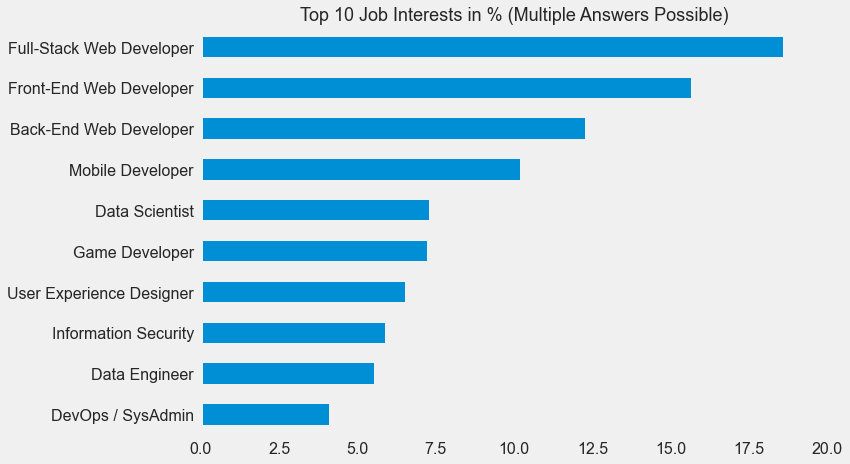

In [162]:
# Visualizing the top 10 Job Interests
%matplotlib inline
plt.style.use('fivethirtyeight')
ax = job_int_pcts.head(10).sort_values().plot.barh(
    figsize=(10, 7), fontsize=16)
ax.set_title(
    "Top 10 Job Interests in % (Multiple Answers Possible)", fontsize=18)
ax.set_xlim(0, 20)
plt.grid(False)

Most respondents were interested in some form of web development, Data Science and Game Development follows after that. So the sample should be representative enough for the target group. Since the main focus of the assumed company is web and mobile development let us see how much interests there is in those fields compared to other fields.

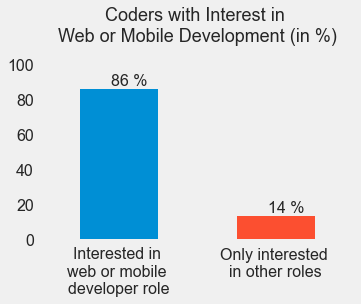

In [272]:
# Create column indicating if person is interested in web or mobile developer role
survey["InterestWebMobile"] = survey["JobRoleInterest"].apply(lambda x: any([re.search(r"(web developer)|(mobile developer)", s, flags = re.IGNORECASE) for s in x]))

# Visualizing interest in web & mobile development versus other fields
per_table_web_moblile = survey["InterestWebMobile"].value_counts(normalize = True)*100

ax = per_table_web_moblile.plot.bar(figsize=(5, 3), fontsize=16, color=['C0', 'C1'])
ax.set_title(
    "Coders with Interest in \nWeb or Mobile Development (in %)", fontsize=18, y = 1.1)
plt.xticks([0,1], labels = ["Interested in \nweb or mobile \ndeveloper role","Only interested \nin other roles"],rotation=0)
plt.grid(False)
i = 0
for index, value in per_table_web_moblile.iteritems():
    plt.text(i-0.05, value+2, str(round(value)) + " %", fontsize=16)
    i += 1
ax.set_ylim(0, 100)
plt.show()

A large majority of respondents (86%) was interested in either a web or mobile developer role, so there should be a clear demand for courses that prepare for these roles.

# Where are new coders located?
After we concluded that the sample has enough respondents of the right categories we can analyze which countries have the highest number of the target population.

In [165]:
# Drop out participants that did not indicate their job interests
survey_filtered = survey.copy()
survey_filtered = survey_filtered[survey_filtered["JobRoleInterest"].notna()]

In [166]:
survey_filtered["CountryLive"].value_counts().head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [167]:
survey_filtered["CountryLive"].value_counts(normalize=True).head(5)

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Name: CountryLive, dtype: float64

(0.0, 50.0)

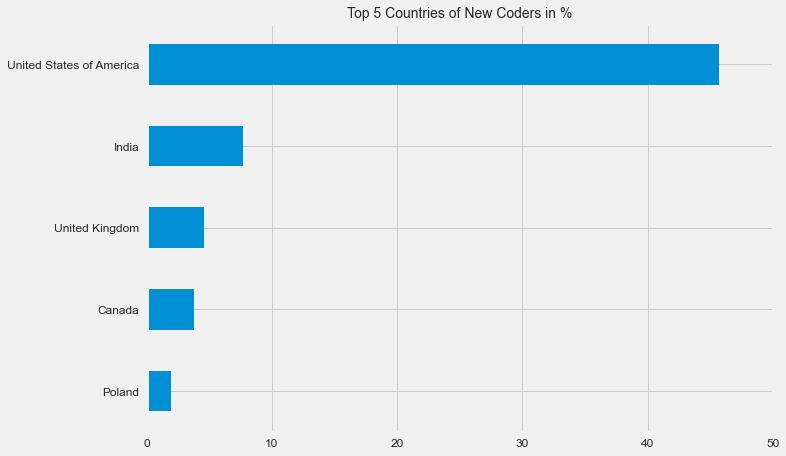

In [168]:
country_t10_pct = survey_filtered["CountryLive"].value_counts(
    normalize=True).head(5).sort_values()
ax = (country_t10_pct*100).plot.barh(figsize=(10, 7), fontsize=12)
ax.set_title("Top 5 Countries of New Coders in %", fontsize=14)
ax.set_xlim((0, 50))

Most respondents that indicated which job role they would be interested in come either from the USA (46%), India (8%), UK (5%) or Canada (4%).
Since English is an official language in all of these countries, they would be a good match to advertise in (assuming our courses are in English). Further analysis will determine if these countries actually have new coders that are also willing to pay for a monthly subscription (assuming $59).

# Which country has the most profitable new coders?
Profitable in this context is defined as new coders that would be willing to spent $59 per month on a subscription service to learn coding.

MoneyForLearning indicated the amount of USD spent on learning how to code *from the moment they started coding*. This means we should be able to infer an approximate amount each respondent was willing to pay *per month*.

In [169]:
survey_filtered["MonthsProgramming"]
# treat 0 months programming as 1 (else we will divide by 0 in the next step)
survey_filtered["Money/Month"] = survey_filtered["MoneyForLearning"] / \
    survey_filtered["MonthsProgramming"].replace(0, 1)

In [170]:
# how  many missing values for money/month?
survey_filtered["Money/Month"].isna().count()

6992

In [171]:
# Filter out null values for Money/Month
survey_filtered = survey_filtered[survey_filtered["Money/Month"].notna()]
# Group by country and get avg. amount spent/month - only for countries of interest
mask = survey_filtered["CountryLive"].isin(
    ["United States of America", "India", "United Kingdom", "Canada"])
country_group = survey_filtered[mask].groupby("CountryLive")
country_group["Money/Month"].mean().sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: Money/Month, dtype: float64

These values look counter-intuitive: Canada and UK are *lower* than the values for India. Given the GDP of these countries we should make sure, these are the correct values.

## Filter out extreme outliers

<AxesSubplot:title={'center':'Money/Month'}, xlabel='CountryLive'>

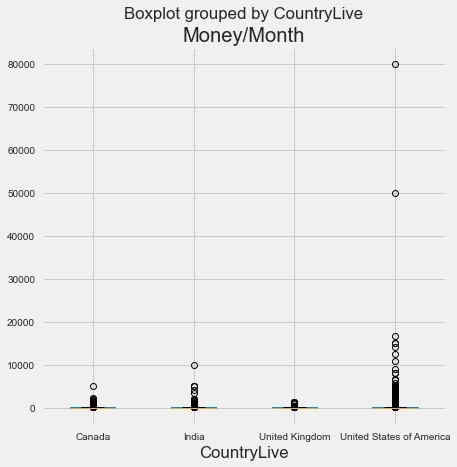

In [172]:
# Inspect outliers
survey_filtered[mask].boxplot(
    by="CountryLive", column="Money/Month", figsize=(7, 7))

In [173]:
# Filter out extreme outliers (> IQR x3 rule)
countries_interest_li = ["United States of America",
                         "India", "United Kingdom", "Canada"]

survey_top4_c = pd.DataFrame()

for c in countries_interest:
    df = survey_filtered[survey_filtered["CountryLive"] == c]
    q1 = df["Money/Month"].quantile(0.25)
    q3 = df["Money/Month"].quantile(0.75)
    IQR = q3-q1
    upper_bound = q3 + (IQR*3)
    df = df[df["Money/Month"] <= upper_bound]
    print(upper_bound)
    survey_top4_c = survey_top4_c.append(df)

NameError: name 'countries_interest' is not defined

In [ ]:
survey_top4_c.boxplot(by="CountryLive", column="Money/Month", figsize=(7, 7))

## Recompute Mean $/Month

In [ ]:
country_group = survey_top4_c.groupby("CountryLive")
country_group["Money/Month"].mean().sort_values(ascending=False)

This suggests, that USA and Canada are on average more willing to spent the most money on learning (after filtering out values that seem unlikely). But in the following step we will look at the number of customer willing to spend above $59.

In [ ]:
country_group2 = survey_filtered[survey_filtered["Money/Month"]
                                 > 59].groupby("CountryLive")
country_group2["Money/Month"].count().sort_values(ascending=False).head(5)